In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

path = "../input/tomato/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['valid', 'train']

In [2]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
****************************************************************************************************
['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


In [3]:
from glob import glob
folders = glob("kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*")
folders

[]

Text(0.5, 1.0, 'Bacterial Spot')

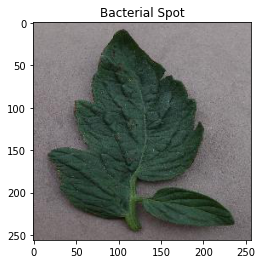

In [4]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

2021-09-19 05:47:08.460283: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-19 05:47:08.460389: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
SIZE = [124, 124]
BATCH_SIZE = 32
num_classes = 2
learning_rate = 0.0001

In [7]:

train_datagen_mnetv2 = ImageDataGenerator(rescale=1./255)
test_datagen_mnetv2 = ImageDataGenerator(rescale=1./255)

In [8]:
seed =random.randint(1, 1000)

In [9]:
training_set_mnetv2 = train_datagen_mnetv2.flow_from_directory(train_path,
                                                 target_size=(124, 124),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=True)


Found 18345 images belonging to 10 classes.


In [10]:

testing_set_mnetv2= test_datagen_mnetv2.flow_from_directory(test_path,
                                                 target_size=(124, 124),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=False)

Found 4585 images belonging to 10 classes.


In [11]:

from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=SIZE + [3])

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)
x = Dense(1280, activation='relu',  kernel_initializer=glorot_uniform(seed))(x)
x = Dropout(rate = .4)(x)
x = BatchNormalization()(x)



# Freezing MobileNet layers
for layer in base_model.layers:
    layer.trainable=False
x = Flatten()(base_model.output)   
predictions = Dense(10, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(lr=learning_rate)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

2021-09-19 05:47:21.323625: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-19 05:47:21.326520: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-19 05:47:21.326555: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-19 05:47:21.326592: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a5e29f549910): /proc/driver/nvidia/version does not exist
2021-09-19 05:47:21.326928: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

9412608/9406464 [==============================] - 0s 0us/step


In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 124, 124, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 62, 62, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 62, 62, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 62, 62, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [13]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(training_set_mnetv2.classes), 
            testing_set_mnetv2.classes)
class_weights

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5 6 7 8 9], y=[0 0 0 ... 9 9 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([1.07882353, 0.95520833, 0.99028078, 0.97553191, 1.0516055 ,
       1.05402299, 1.00328228, 0.93571429, 1.0234375 , 0.95322245])

In [14]:
nb_train_samples = training_set_mnetv2.samples
nb_validation_samples = testing_set_mnetv2.samples

In [15]:
epochs=20
import tensorflow as tf
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.tflite',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,verbose=1)
]

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit_generator(training_set_mnetv2,
                       validation_data=testing_set_mnetv2,
                       epochs=20,
                       callbacks=[callback],
                     )
  #  callbacks=[callback]   ,    ,steps_per_epoch=len(trainning_set_vg19),validation_steps=nb_validation_samples,steps_per_epoch=nb_train_samples, class_weight = class_weights
                     #  validation_steps=len(testing_set_vg19),

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-19 05:47:23.670315: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-19 05:47:23.674710: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/20
1147/1147 [==============================] - 174s 149ms/step - loss: 2.3078 - accuracy: 0.6888 - val_loss: 2.8059 - val_accuracy: 0.7405
Epoch 2/20
1147/1147 [==============================] - 162s 141ms/step - loss: 0.9138 - accuracy: 0.8836 - val_loss: 2.9191 - val_accuracy: 0.7860
Epoch 3/20
1147/1147 [==============================] - 161s 140ms/step - loss: 0.7297 - accuracy: 0.9152 - val_loss: 2.2120 - val_accuracy: 0.8294
Epoch 4/20
1147/1147 [==============================] - 162s 141ms/step - loss: 0.4518 - accuracy: 0.9415 - val_loss: 2.0766 - val_accuracy: 0.8565
Epoch 5/20
1147/1147 [==============================] - 164s 143ms/step - loss: 0.4138 - accuracy: 0.9487 - val_loss: 2.1369 - val_accuracy: 0.8606
Epoch 6/20
1147/1147 [==============================] - 162s 141ms/step - loss: 0.4253 - accuracy: 0.9518 - val_loss: 2.5031 - val_accuracy: 0.8550
Epoch 7/20
1147/1147 [==============================] - 162s 141ms/step - loss: 0.3759 - accuracy: 0.9601 - val_

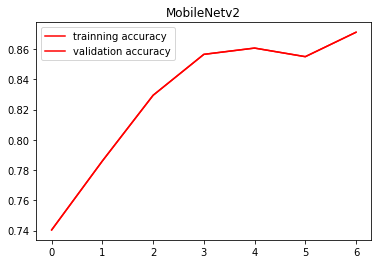

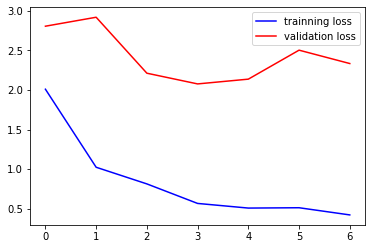

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history['val_accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.title("MobileNetv2")
plt.plot(epochs, accuracy, "r", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.models import load_model
# Load the best saved model

Y_pred = model.predict_generator(testing_set_mnetv2, nb_validation_samples // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [18]:
model.save("mnet_tl.model")

2021-09-19 06:06:54.451389: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [19]:
from tensorflow import lite

In [20]:
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

tfmodel_size = len(tfmodel) / 1024
print('tfmodel size = %dKBs.' % tfmodel_size)

#open('tomato.tflite', 'wb').write(tfmodel)
#modelvg.save("tomato.tflite")

2021-09-19 06:07:34.668902: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-09-19 06:07:34.669101: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-09-19 06:07:34.669460: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-19 06:07:34.686421: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.005ms.
  function_optimizer: function_optimizer did nothing. time = 0ms.



tfmodel size = 9451KBs.


2021-09-19 06:07:36.305236: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-09-19 06:07:36.305311: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2021-09-19 06:07:36.431100: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [22]:
open('tomato.tflite', 'wb').write(tfmodel)

f = open('tomato.tflite', "wb")
f.write(tfmodel)
f.close()